# Single threaded convolution

In [1]:
%matplotlib inline
import pandas as pd
from os import listdir
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_rows', 100)

path = 'csv'
prefix = 'convolution_test_2048x2048'

columns = ['stat', 'rank', 'size', 'round', 'time_ms']
data = pd.DataFrame(columns=columns + ['method'])
for file in listdir(path):
    if not file.endswith('.csv') or file == 'stats.csv' or not file.startswith(prefix):
        continue
    print(file)
    
    d = pd.read_csv(os.path.join(path, file), names=columns)
    d['method'] = file.replace('.csv', '').split('_')[-1]
    d['image_size'] = int(file.replace('.csv', '').split('_')[-2].split('x')[-1])
    
    data = pd.concat([data, d])
data.reset_index()

for t in ['rank', 'size', 'round', 'time_ms']:
    data[t] = data[t].astype('int')

# skip first run
#data = data[(data['round'] == 0) | (data['stat'].isin(['read', 'write']))]
data['image_size'].unique()

def fix_labels(ax):
    for label in ax.legend().get_texts():
        n = int(float(label.get_text()))
        label.set_text(f"2048x2048x{n}x{n}x{n}")

convolution_test_2048x2048x10x10x10_mpi.csv
convolution_test_2048x2048x10x10x10_mpisingle.csv
convolution_test_2048x2048x12x12x12_default.csv
convolution_test_2048x2048x12x12x12_mpi.csv
convolution_test_2048x2048x12x12x12_mpisingle.csv
convolution_test_2048x2048x14x14x14_mpi.csv
convolution_test_2048x2048x14x14x14_mpisingle.csv
convolution_test_2048x2048x16x16x16_default.csv
convolution_test_2048x2048x16x16x16_mpi.csv
convolution_test_2048x2048x18x18x18_mpi.csv
convolution_test_2048x2048x1x1x1_default.csv
convolution_test_2048x2048x1x1x1_mpi.csv
convolution_test_2048x2048x1x1x1_mpisingle.csv
convolution_test_2048x2048x2x2x2_default.csv
convolution_test_2048x2048x2x2x2_mpi.csv
convolution_test_2048x2048x2x2x2_mpisingle.csv
convolution_test_2048x2048x3x3x3_default.csv
convolution_test_2048x2048x3x3x3_mpi.csv
convolution_test_2048x2048x3x3x3_mpisingle.csv
convolution_test_2048x2048x4x4x4_default.csv
convolution_test_2048x2048x4x4x4_mpi.csv
convolution_test_2048x2048x4x4x4_mpisingle.csv
co

In [2]:
def by_imagesize(method, stat='total_op'):
    series = {}
    for image_size in sorted(data['image_size'].unique()):
        ds = data[(data['stat'] == stat) & (data['method'] == method) & (data['image_size'] == image_size) & (data['size'] != 7)].pivot_table(index=['size', 'round'], columns='rank', values='time_ms')
        time = defaultdict(list)
        for idx, times in ds.iterrows():
            size, round = idx
            time[size].append(max(times))
        
        averaged = {k: sum(v)/len(v) for k, v in time.items()} 
        series[image_size] = pd.Series(averaged, dtype=np.float64)

    
    df = pd.DataFrame(series).dropna(axis=1,how='all')
    df.index.name = 'size'
    return df
display(by_imagesize('mpisingle'))

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0,14.0
size,,,,,,,,,,,
1,1129.333333,11085.000000,37992.333333,90161.000000,176369.000000,294600.000000,461736.333333,753702.333333,1.525120e+06,2.469046e+06,4.023378e+06
2,1178.333333,6178.666667,21088.666667,45501.666667,92541.000000,153073.333333,255620.333333,376013.666667,7.439330e+05,1.197303e+06,1.954149e+06
4,874.000000,3514.666667,10787.666667,24257.333333,48802.000000,75583.666667,125979.333333,198727.666667,3.612407e+05,6.109723e+05,9.832047e+05
6,944.666667,2985.333333,7737.000000,17822.333333,34036.333333,51669.333333,87969.000000,133332.666667,2.401663e+05,4.176837e+05,6.699490e+05
8,1066.333333,2384.333333,6494.333333,12731.666667,26243.000000,40110.666667,68981.666667,100253.666667,1.851227e+05,3.101160e+05,4.818810e+05
10,1682.000000,2471.333333,5483.333333,11344.333333,20891.666667,33465.000000,54422.666667,81022.000000,1.478707e+05,2.573787e+05,4.096840e+05
12,1434.000000,2473.000000,4936.666667,9867.000000,17829.666667,26981.000000,47635.666667,67051.000000,1.257030e+05,2.119157e+05,3.485353e+05
14,1621.333333,2557.333333,4595.000000,9561.666667,16437.000000,24583.666667,41582.666667,60368.333333,1.102930e+05,1.932423e+05,2.883210e+05
16,1852.666667,2606.333333,4880.666667,7874.666667,14411.666667,22266.000000,37435.666667,55447.666667,9.650433e+04,1.656993e+05,2.621463e+05


## Single threaded convolution time as a function of image size and number of nodes

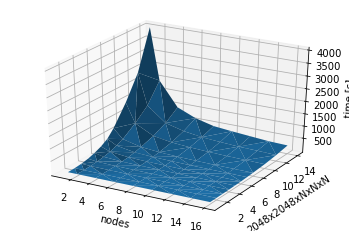

In [3]:
d = pd.DataFrame(by_imagesize('mpisingle').unstack().reset_index())
d.rename(columns={'level_0':'image_size', 0: 'time_ms'}, inplace=True)

fig = plt.figure()
ax = fig.gca(projection='3d') #, title='Convolution time of image size on number of nodes/1thread')
ax.plot_trisurf(d['size'], d['image_size'], d['time_ms'] / 1000)
ax.set_xlabel('nodes')
ax.set_ylabel('2048x2048xNxNxN')
ax.set_zlabel('time [s]')
plt.savefig('figures/convolve_mpisingle_3d.pdf')
plt.show()

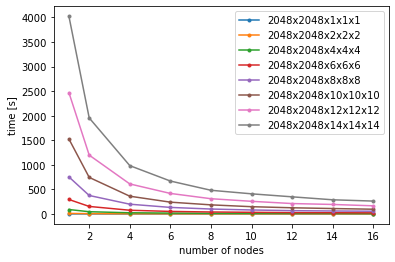

In [4]:
ds = (by_imagesize('mpisingle')/1000)
del ds[3]
del ds[5]
del ds[7]
ax = ds.plot(marker='.')#, title='Convolution time for single thread')
ax.set_ylabel('time [s]')
ax.set_xlabel('number of nodes')
#ax.legend(loc=(1.02,0), title='2048x2048xNxNxN')
fix_labels(ax)
plt.savefig('figures/convolve_mpisingle_time.pdf')

,1.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0
size,,,,,,,,
1,1129.333333,11085.000000,90161.000000,294600.000000,753702.333333,1.525120e+06,2.469046e+06,4.023378e+06
2,1178.333333,6178.666667,45501.666667,153073.333333,376013.666667,7.439330e+05,1.197303e+06,1.954149e+06
4,874.000000,3514.666667,24257.333333,75583.666667,198727.666667,3.612407e+05,6.109723e+05,9.832047e+05
6,944.666667,2985.333333,17822.333333,51669.333333,133332.666667,2.401663e+05,4.176837e+05,6.699490e+05
8,1066.333333,2384.333333,12731.666667,40110.666667,100253.666667,1.851227e+05,3.101160e+05,4.818810e+05
10,1682.000000,2471.333333,11344.333333,33465.000000,81022.000000,1.478707e+05,2.573787e+05,4.096840e+05
12,1434.000000,2473.000000,9867.000000,26981.000000,67051.000000,1.257030e+05,2.119157e+05,3.485353e+05
14,1621.333333,2557.333333,9561.666667,24583.666667,60368.333333,1.102930e+05,1.932423e+05,2.883210e+05
16,1852.666667,2606.333333,7874.666667,22266.000000,55447.666667,9.650433e+04,1.656993e+05,2.621463e+05


,1.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,ideal
size,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
2,0.958416,1.794076,1.981488,1.924568,2.004455,2.050077,2.062174,2.058890,2
4,1.292143,3.153926,3.716855,3.897667,3.792639,4.221895,4.041175,4.092106,4
6,1.195483,3.713153,5.058877,5.701641,5.652796,6.350266,5.911282,6.005499,6
8,1.059081,4.649098,7.081634,7.344680,7.517953,8.238429,7.961685,8.349319,8
10,0.671423,4.485433,7.947668,8.803227,9.302440,10.313878,9.593048,9.820686,10
12,0.787541,4.482410,9.137630,10.918795,11.240732,12.132726,11.651078,11.543673,12
14,0.696546,4.334593,9.429423,11.983566,12.485061,13.827895,12.776942,13.954509,14
16,0.609572,4.253101,11.449501,13.230935,13.593040,15.803643,14.900760,15.347832,16


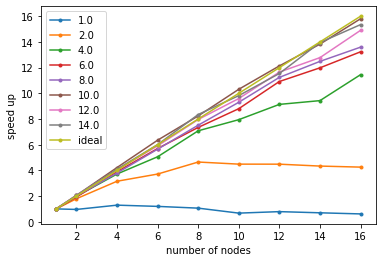

In [5]:
ds = by_imagesize('mpisingle')
del ds[3]
del ds[5]
del ds[7]

display(ds)
speedup = ds.iloc[0] / ds
speedup['ideal'] = [1] + list(range(2, 17, 2))
display(speedup)
ax = speedup.plot(marker='.') #, title='convolution speedup for single thread')
ax.set_ylabel('speed up')
ax.set_xlabel('number of nodes')
plt.savefig('figures/convolve_mpisingle_speedup.pdf')

# MPI Gathering time

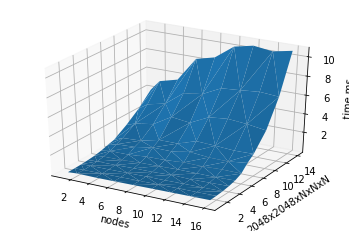

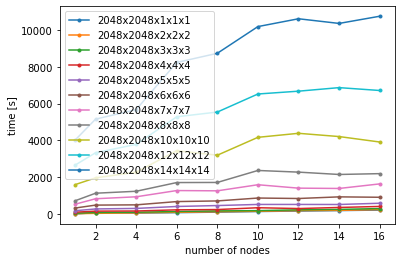

In [6]:
d = pd.DataFrame(by_imagesize('mpisingle', stat='gather').unstack().reset_index())
d.rename(columns={'level_0':'image_size', 0: 'time_ms'}, inplace=True)

fig = plt.figure()
ax = fig.gca(projection='3d')#, title='Gathering time for single thread')
ax.plot_trisurf(d['size'], d['image_size'], d['time_ms'] / 1000)
ax.set_xlabel('nodes')
ax.set_ylabel('2048x2048xNxNxN')
ax.set_zlabel('time ms')
plt.savefig('figures/convolve_mpisingle_gathertime.pdf')
plt.show()


ax = by_imagesize('mpisingle', stat='gather').plot(marker='.')#, title='Gathering time for single thread')
ax.set_ylabel('time [s]')
ax.set_xlabel('number of nodes')
fix_labels(ax)